In [1]:
import pennylane as qml

def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

In [2]:
dev = qml.device('default.qubit', wires=2, shots=1000)

In [3]:
shots_list = [5, 10, 1000]
dev = qml.device("default.qubit", wires=2, shots=shots_list)

In [4]:
@qml.qnode(dev)
def circuit(x):
    qml.RX(x, wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1)), qml.expval(qml.PauliZ(0))

In [5]:
results = circuit(0.5)
results

((-0.6, 0.6), (0.0, 0.8), (-0.01, 0.882))

In [6]:
results[0]

(-0.6, 0.6)

In [7]:
import numpy as np
dev = qml.device('default.qubit', wires=3)
dev_unique_wires = qml.device('default.qubit', wires=[0, 1, 2])
def my_quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=2)
    return qml.expval(qml.PauliZ(2))

In [8]:
circuit = qml.QNode(my_quantum_function, dev_unique_wires)
circuit(np.pi/4, 0.7)

tensor(0.76484219, requires_grad=True)

In [9]:
circuit = qml.QNode(my_quantum_function, dev_unique_wires)
circuit(np.pi/4, 0.7)

tensor(0.76484219, requires_grad=True)

In [10]:
print(qml.draw(circuit)(np.pi/4, 0.7))

0: ──RZ(0.79)─╭●─┤     
1: ───────────╰X─┤     
2: ──RY(0.70)────┤  <Z>


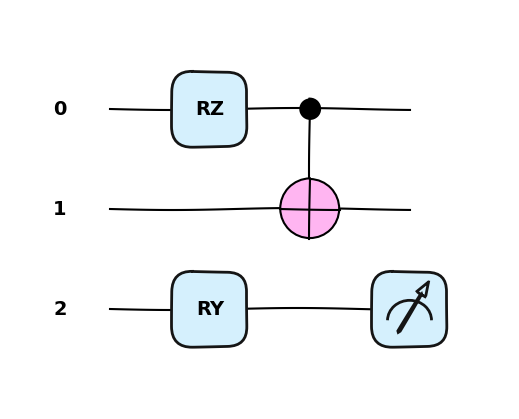

In [18]:
import matplotlib.pyplot as plt
qml.drawer.use_style("pennylane_sketch")
fig, ax = qml.draw_mpl(circuit)(np.pi/4, 0.7)
plt.show()